# **Import Important Libraries**

In [1]:
from google.colab import drive                                        # For import dataset
import warnings                                                       # For ignoring warnings
import pandas as pd                                                   # For loading dataset
import matplotlib.pyplot as plt                                       # For data vizualization
import seaborn as sns                                                 # For displaying confusion matrix, distance plots
from sklearn.preprocessing import StandardScaler                      # For dataset preprocessing
from sklearn.model_selection import train_test_split                  # For splitting dataset
from sklearn.naive_bayes import GaussianNB                            # For Naive Bayes Classifier
from sklearn.linear_model import LogisticRegression                   # For Logistic Regression
from sklearn.svm import SVC                                           # For Support Vector Machines
from sklearn.neighbors import KNeighborsClassifier                    # For K-Nearest Neighbours Classifier
from sklearn.ensemble import RandomForestClassifier                   # For Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier                       # For Decision Tree Classifier
from sklearn.metrics import confusion_matrix, classification_report   # For confusion matrix and classification report
import pickle                                                         # For storing and loading the model

# **Load Dataset**

In [2]:
# Load data from drive
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/Churn_Modelling.csv',encoding='latin-1')
data.head()

Mounted at /content/drive


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Analysis**

In [3]:
# See information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Dataset contains 10000 entries and 14 columns with no null values

In [4]:
#drop unnecessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


([<matplotlib.patches.Wedge at 0x7a2d3ca4a740>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'Stay'),
  Text(1.0427691685907372, -0.7762940557782105, 'Leave')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.6417041037481458, -0.4777194189404372, '20.4%')])

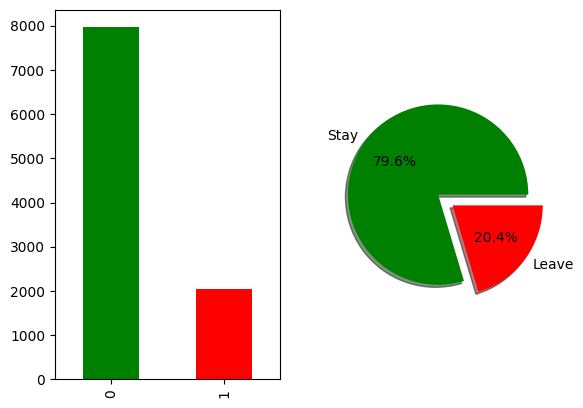

In [5]:
# Vizualize dataset
plt.subplot(121)
data['Exited'].value_counts().plot(kind='bar',color=['g','r'])
plt.subplot(122)
plt.pie(data['Exited'].value_counts(),colors=['g','r'],labels=['Stay','Leave'],autopct='%1.1f%%',shadow=True,explode=(0,0.2))

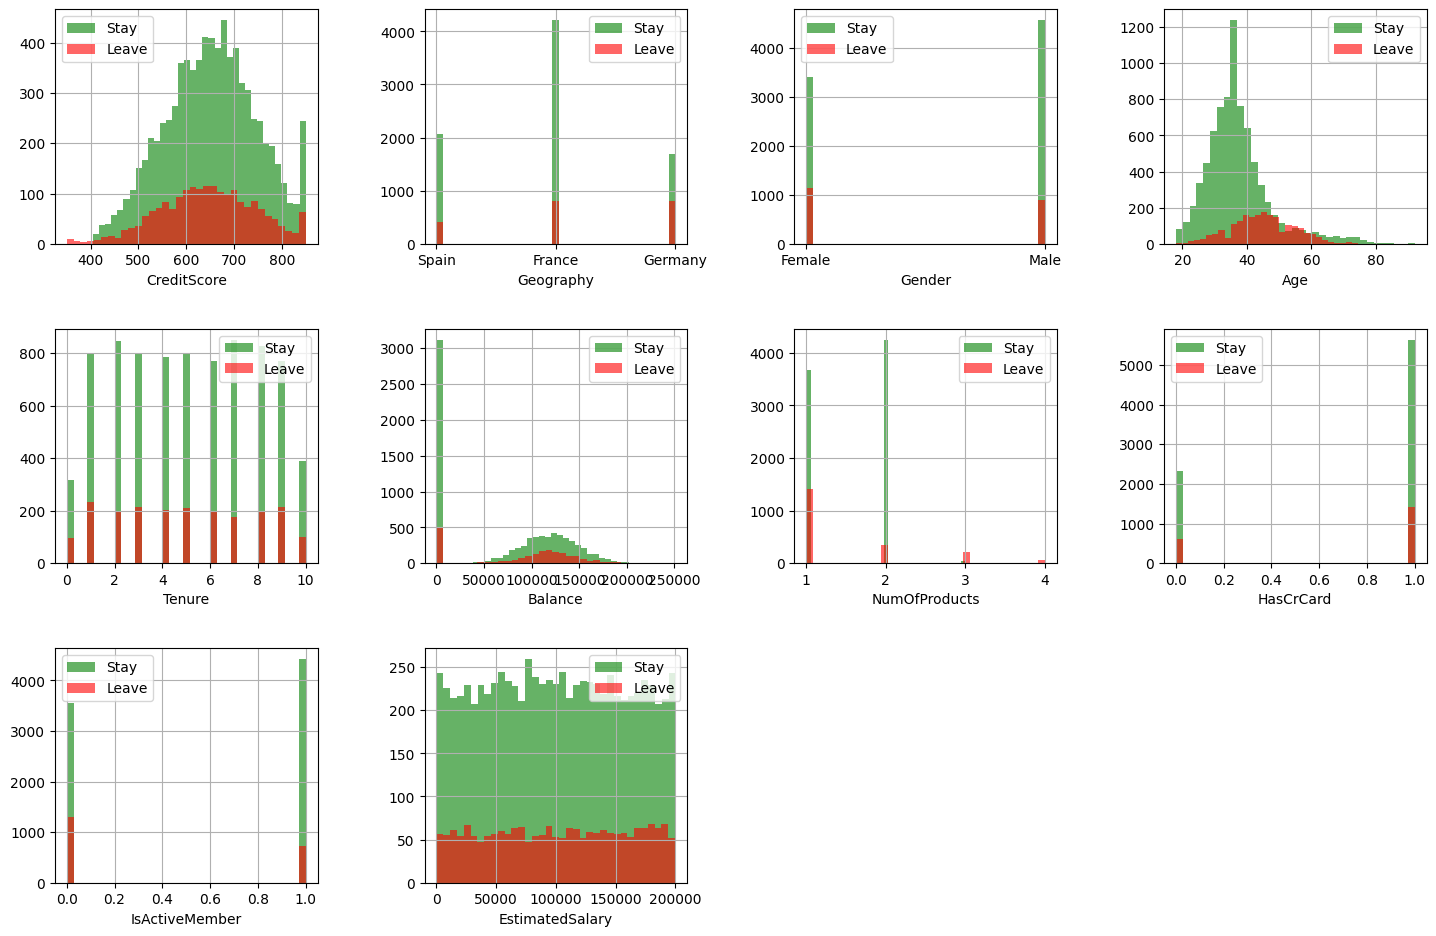

In [6]:
# Distribution of columns
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns[:-1],1):
    plt.subplot(3,4,i)
    data[data['Exited']==0][col].hist(bins=35, color='g', alpha=0.6,label="Stay")
    data[data['Exited']==1][col].hist(bins=35, color='r', alpha=0.6,label="Leave")
    plt.xlabel(col)
    plt.legend()
plt.tight_layout(pad=3)

From above plots, we find that only *CreditScore, Age, Balance, EstimatedSalary* have continuous data. Rest all are categorical data.

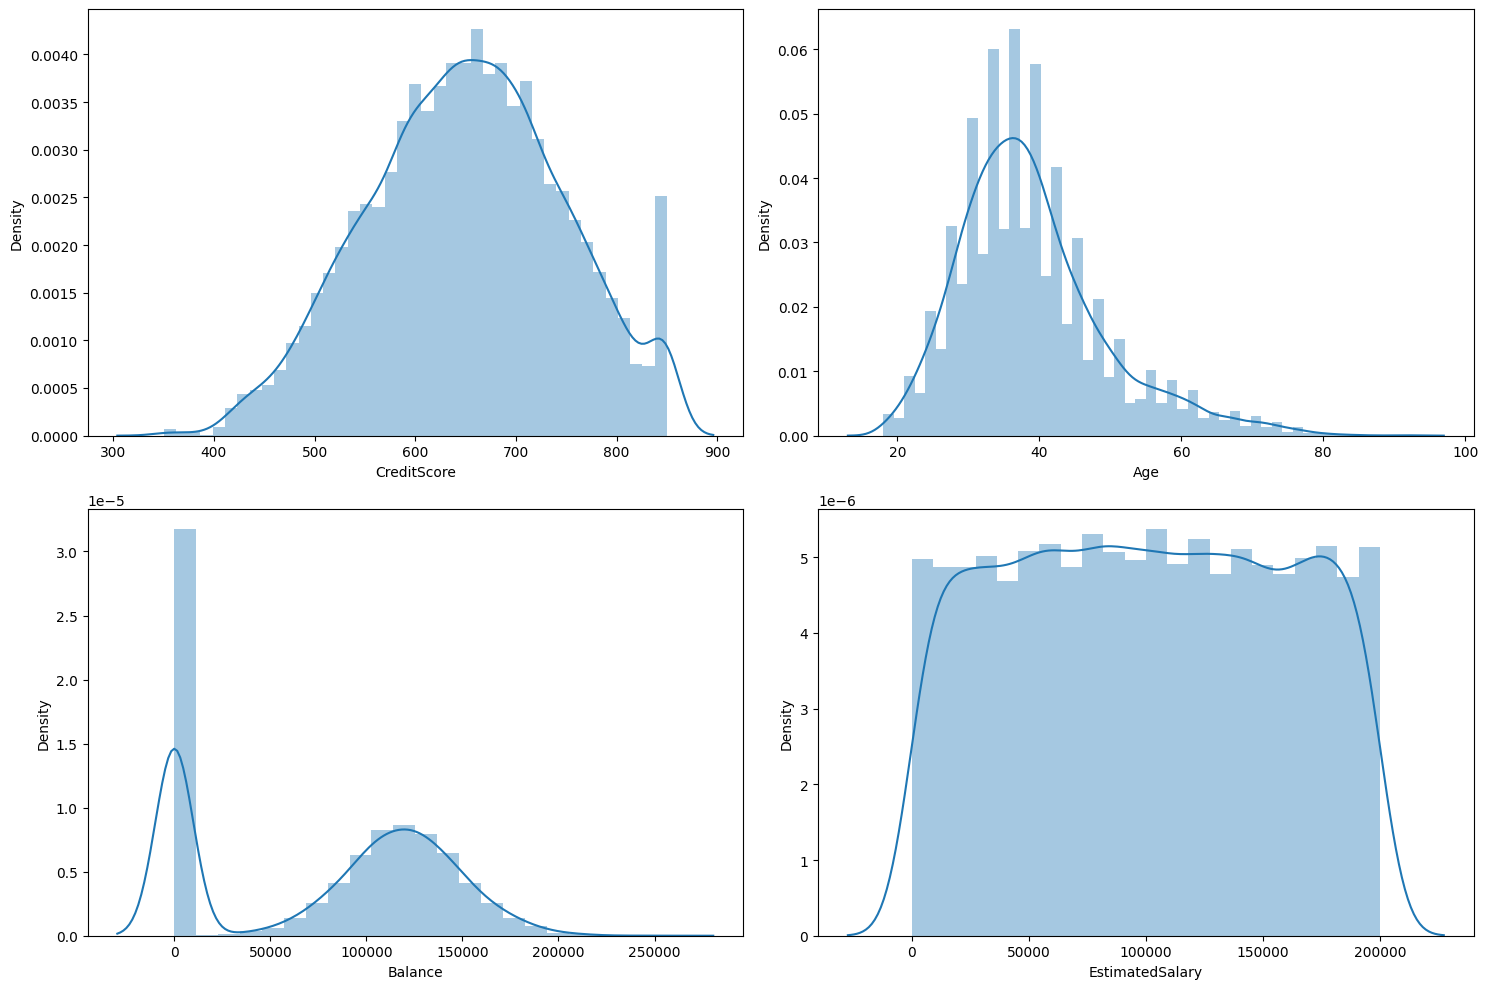

In [7]:
# Distance plots
warnings.filterwarnings('ignore')
rows=2
cols=2
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(15,10))
col=['CreditScore','Age','Balance','EstimatedSalary']
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j])
        index=index+1

plt.tight_layout()

Not much skewness is present in these numerical data.

# **Dataset Preprocessing**

In [8]:
# One hot encoding
data = pd.get_dummies(data, columns=["Geography","Gender"], drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<Axes: >

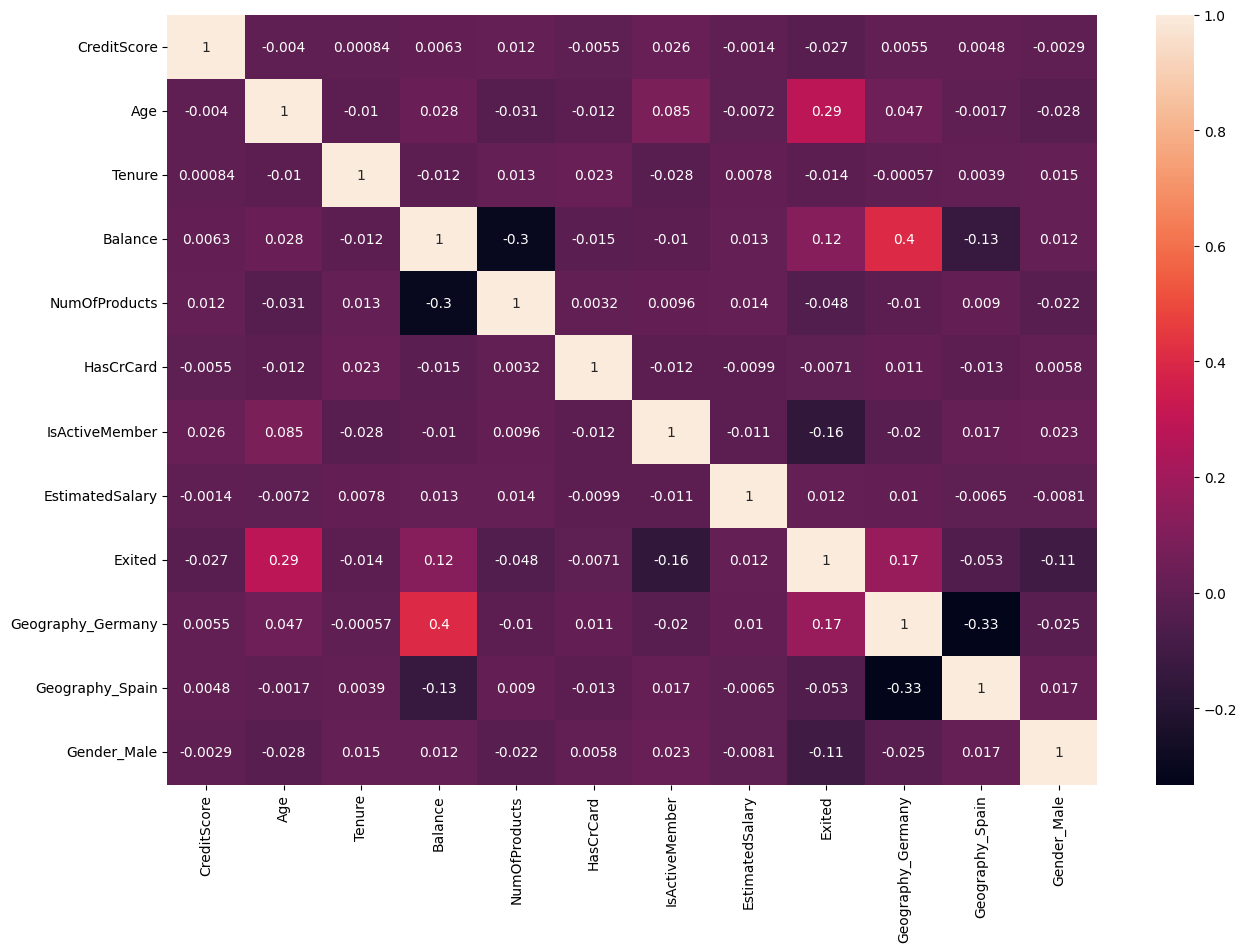

In [9]:
# Corelation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

There is not much correlation between the columns and hence we can include all columns for training.

In [10]:
# Store mean and standard deviation of numerical values for later use
mean_crsc =  data['CreditScore'].mean()
mean_age =  data['Age'].mean()
mean_bal =  data['Balance'].mean()
mean_sal =  data['EstimatedSalary'].mean()
std_crsc =  data['CreditScore'].std()
std_age =  data['Age'].std()
std_bal =  data['Balance'].std()
std_sal =  data['EstimatedSalary'].std()

In [11]:
# Standardization
data[['CreditScore','Age','Balance','EstimatedSalary']] = StandardScaler().fit_transform(data[['CreditScore','Age','Balance','EstimatedSalary']])
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,1,0


In [12]:
# Prepare features and target
features = data.drop(columns=['Exited'])
target = data['Exited']

In [13]:
# Splitting dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=15)

# **Train Classifiers**

In [14]:
# Function to display confusion matrix and classification report
def plot_report(model):

  # Training and testing predictions
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)

  plt.figure(figsize=(15,6))

  labels = ['Stay','Leave']

  # Confusion matrix
  plt.subplot(121)
  plt.title("Train Confusion Matrix")
  sns.heatmap(confusion_matrix(Y_train, pred_train),annot=True)
  plt.subplot(122)
  plt.title("Test Confusion Matrix")
  sns.heatmap(confusion_matrix(Y_test, pred_test),annot=True)

  # Classification report
  print('\nTrain Classification Report:')
  print(classification_report(Y_train, pred_train,target_names=labels))
  print('\nTest Classification Report:')
  print(classification_report(Y_test, pred_test,target_names=labels))

## **Naive Bayes**


Train Classification Report:
              precision    recall  f1-score   support

        Stay       0.85      0.95      0.89      5569
       Leave       0.62      0.33      0.43      1431

    accuracy                           0.82      7000
   macro avg       0.73      0.64      0.66      7000
weighted avg       0.80      0.82      0.80      7000


Test Classification Report:
              precision    recall  f1-score   support

        Stay       0.86      0.95      0.90      2394
       Leave       0.67      0.36      0.47       606

    accuracy                           0.83      3000
   macro avg       0.76      0.66      0.69      3000
weighted avg       0.82      0.83      0.81      3000



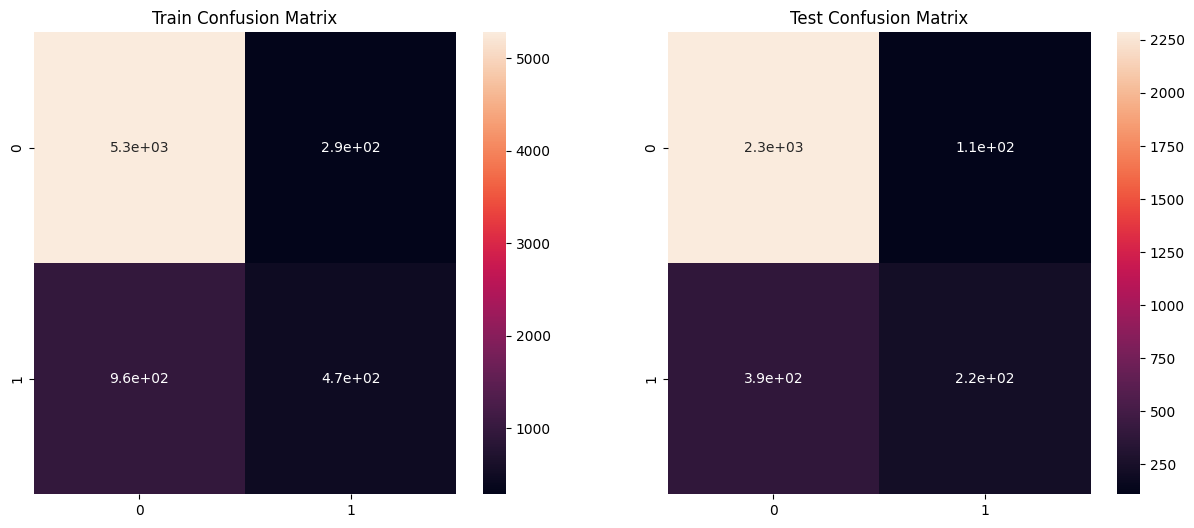

In [15]:
model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)
plot_report(model_nb)

## **Logistic Regression**


Train Classification Report:
              precision    recall  f1-score   support

        Stay       0.83      0.97      0.89      5569
       Leave       0.61      0.21      0.31      1431

    accuracy                           0.81      7000
   macro avg       0.72      0.59      0.60      7000
weighted avg       0.78      0.81      0.77      7000


Test Classification Report:
              precision    recall  f1-score   support

        Stay       0.83      0.97      0.89      2394
       Leave       0.64      0.20      0.31       606

    accuracy                           0.82      3000
   macro avg       0.73      0.59      0.60      3000
weighted avg       0.79      0.82      0.78      3000



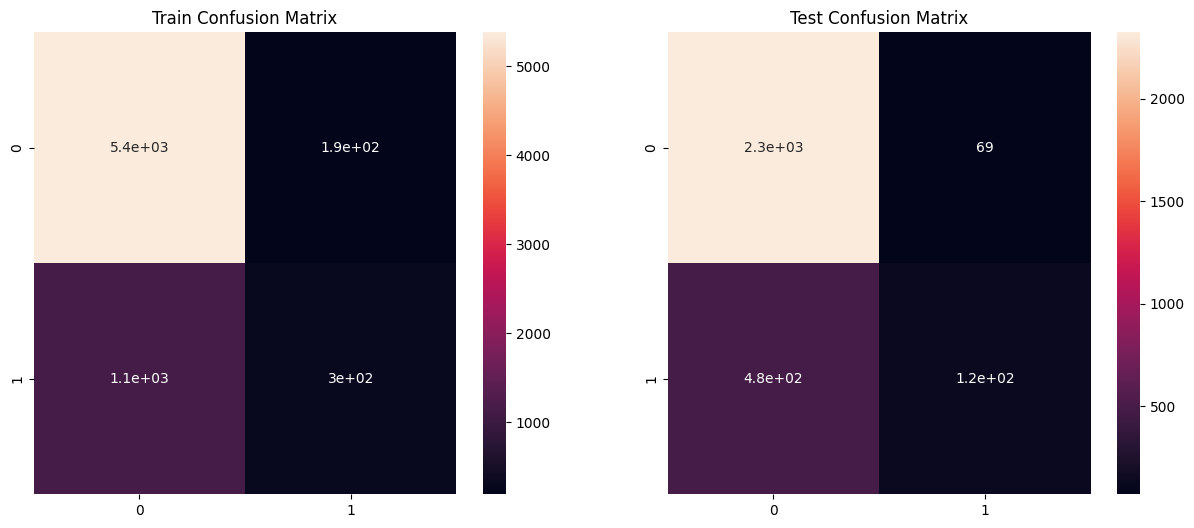

In [16]:
model_lr = LogisticRegression(solver="liblinear")
model_lr.fit(X_train,Y_train)
plot_report(model_lr)

## **Support Vector Machine**


Train Classification Report:
              precision    recall  f1-score   support

        Stay       0.82      1.00      0.90      5569
       Leave       0.92      0.13      0.22      1431

    accuracy                           0.82      7000
   macro avg       0.87      0.56      0.56      7000
weighted avg       0.84      0.82      0.76      7000


Test Classification Report:
              precision    recall  f1-score   support

        Stay       0.82      1.00      0.90      2394
       Leave       0.94      0.14      0.24       606

    accuracy                           0.82      3000
   macro avg       0.88      0.57      0.57      3000
weighted avg       0.85      0.82      0.77      3000



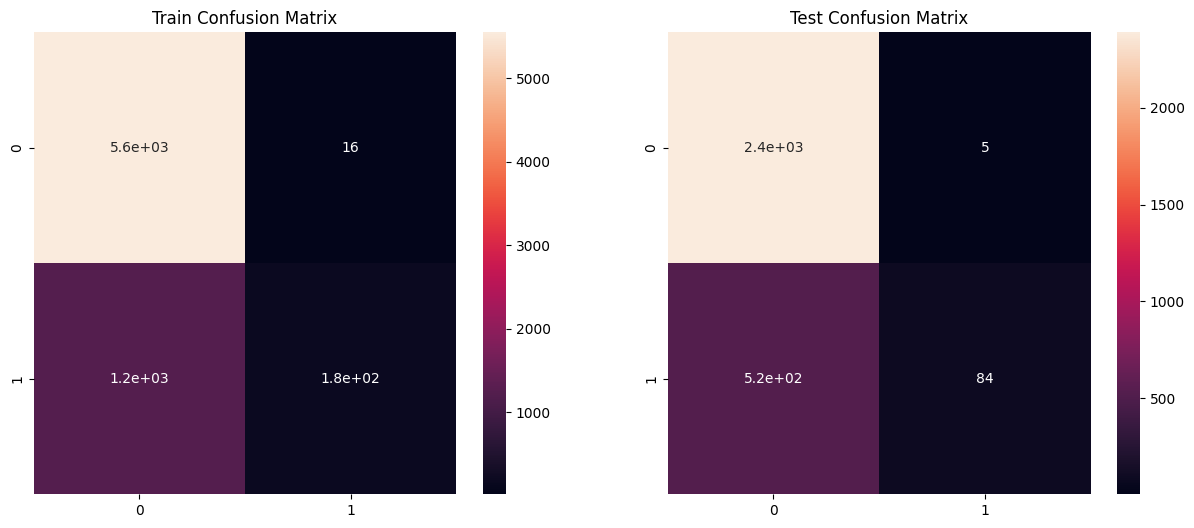

In [17]:
model_svm = SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
plot_report(model_svm)

## **K-Nearest Neighbours**


Train Classification Report:
              precision    recall  f1-score   support

        Stay       0.88      0.97      0.92      5569
       Leave       0.81      0.46      0.59      1431

    accuracy                           0.87      7000
   macro avg       0.84      0.72      0.75      7000
weighted avg       0.86      0.87      0.85      7000


Test Classification Report:
              precision    recall  f1-score   support

        Stay       0.85      0.95      0.90      2394
       Leave       0.64      0.33      0.44       606

    accuracy                           0.83      3000
   macro avg       0.74      0.64      0.67      3000
weighted avg       0.81      0.83      0.80      3000



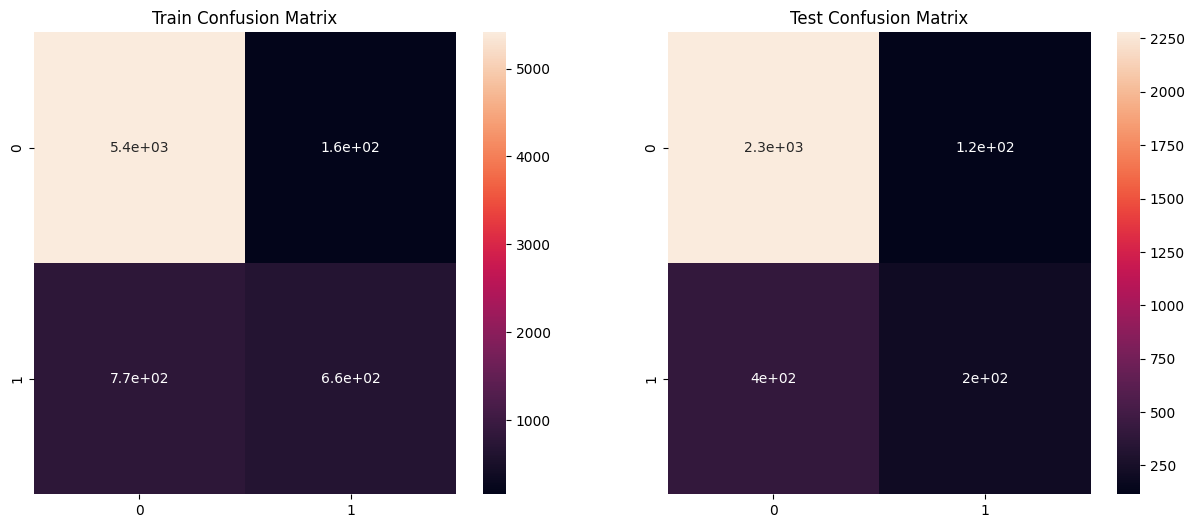

In [18]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,Y_train)
plot_report(model_knn)

## **Random Forest Classifier**


Train Classification Report:
              precision    recall  f1-score   support

        Stay       1.00      1.00      1.00      5569
       Leave       1.00      1.00      1.00      1431

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000


Test Classification Report:
              precision    recall  f1-score   support

        Stay       0.88      0.96      0.92      2394
       Leave       0.76      0.46      0.57       606

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



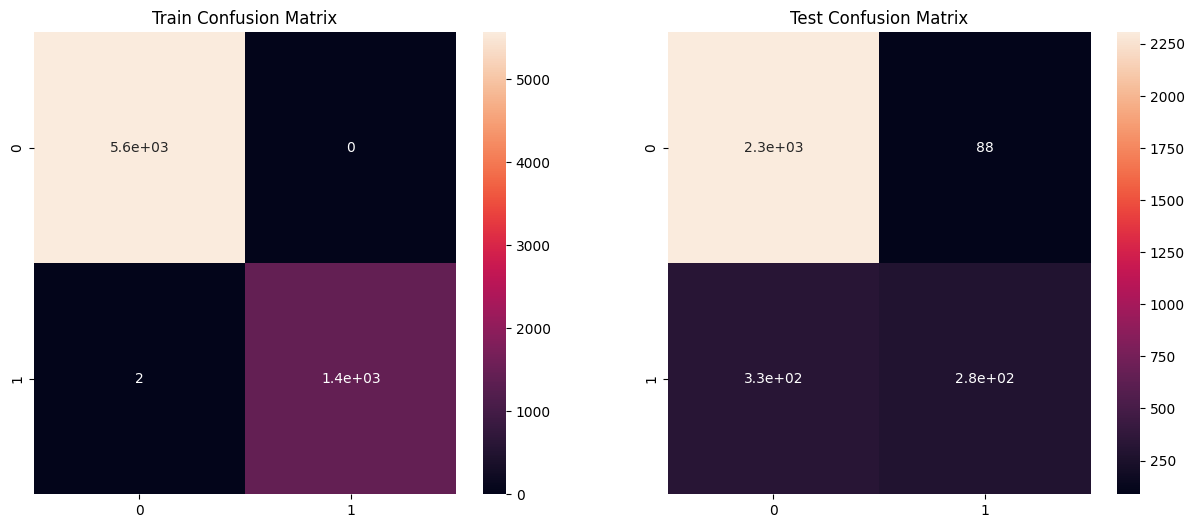

In [19]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,Y_train)
plot_report(model_rfc)

## **Decision Tree Classifier**


Train Classification Report:
              precision    recall  f1-score   support

        Stay       1.00      1.00      1.00      5569
       Leave       1.00      1.00      1.00      1431

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000


Test Classification Report:
              precision    recall  f1-score   support

        Stay       0.87      0.86      0.87      2394
       Leave       0.48      0.50      0.49       606

    accuracy                           0.79      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000



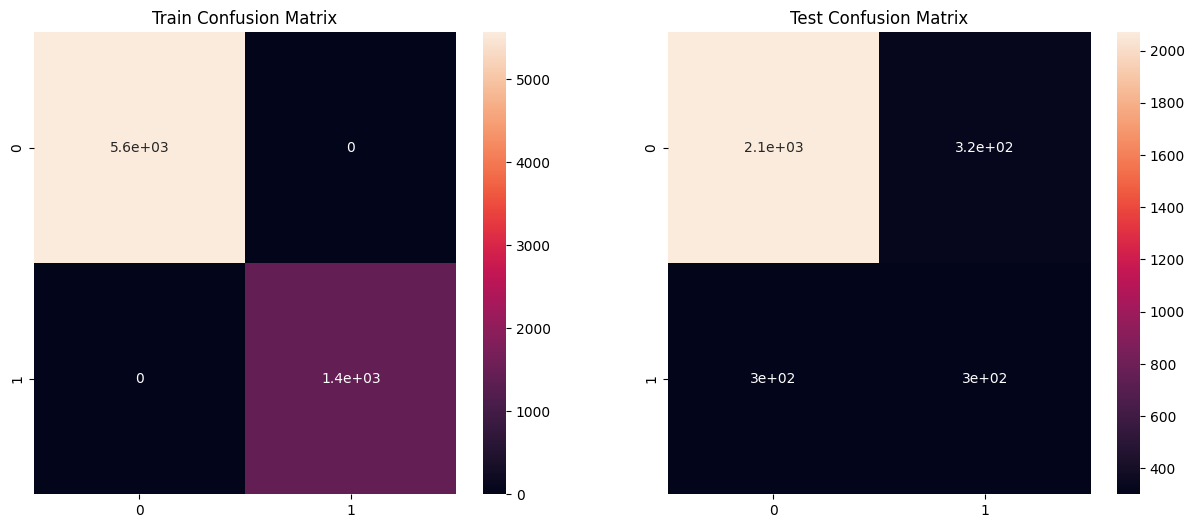

In [20]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)
plot_report(model_dt)

From the above classifiers, *Random Forest Classifier* fits the best with *training accuracy of 100%* and *testing accuracy of 86%.*

## **Store the best model**

In [21]:
pickle.dump(model_rfc,open("predictor.pkl","wb"))

# **Final Application**

In [22]:
# Take inputs
crsc = int(input("Enter customer's credit score                    : "))
age  = int(input("Enter customer's age                             : "))
gen  = input("Enter customer's gender                          : ")
loc  = input("Enter customer's location                        : ")
ten  = int(input("Enter customer's tenure in bank                  : "))
bal  = float(input("Enter customer's balance                         : "))
fac  = int(input("Enter the number of facilities customer is using : "))
cred = input("Does the customer have a credit card (y/n)       : ")
mem  = input("Is the customer an active member (y/n)           : ")
sal  = float(input("Enter customer's estimated salary                : "))

# Standardization
crsc = (crsc - mean_crsc) / std_crsc
age = (age - mean_age) / std_age
bal = (bal - mean_bal) / std_bal
sal = (sal - mean_sal) / std_sal

# Encode gender
if gen.lower() == "male":
  gen_m = 1
else:
  gen_m = 0

# Encode location
if loc.lower() == "germany":
  loc_g = 1
  loc_s = 0
elif loc.lower() == "spain":
  loc_g = 0
  loc_s = 1
else:
  loc_g = 0
  loc_s = 0

# Encode credit card
if cred.lower() == "y":
  cred = 1
else:
  cred = 0

# Encode active member
if mem.lower() == "y":
  mem = 1
else:
  mem = 0

# Features
feat = [[crsc, age, ten, bal, fac, cred, mem, sal, loc_g, loc_s, gen_m]]

# Load model
model = pickle.load(open("predictor.pkl","rb"))

# Predict stay or leave
pred = model.predict(feat)

# Display prediction
if pred==0:
  print("\nPrediction                                       : Stay")
else:
  print("\nPrediction                                       : Leave")

Enter customer's credit score                    : 671
Enter customer's age                             : 45
Enter customer's gender                          : male
Enter customer's location                        : germany
Enter customer's tenure in bank                  : 6
Enter customer's balance                         : 99564.22
Enter the number of facilities customer is using : 1
Does the customer have a credit card (y/n)       : y
Is the customer an active member (y/n)           : y
Enter customer's estimated salary                : 108872.45

Prediction                                       : Leave
